In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

In [6]:
cities

['new norfolk',
 'atuona',
 'nizhneyansk',
 'mount isa',
 'sibu',
 'port alfred',
 'busselton',
 'ndjole',
 'ushuaia',
 'hermanus',
 'tabas',
 'springbok',
 'punta arenas',
 'nouadhibou',
 'tiksi',
 'faanui',
 'mataura',
 'gueret',
 'araouane',
 'viedma',
 'tasbuget',
 'albany',
 'port blair',
 'zhigansk',
 'ismailia',
 'whitehaven',
 'bluff',
 'mulege',
 'nantucket',
 'arraial do cabo',
 'hithadhoo',
 'sao filipe',
 'avarua',
 'bathsheba',
 'kodiak',
 'naugarzan',
 'rikitea',
 'klaksvik',
 'severo-kurilsk',
 'kauhajoki',
 'artyk',
 'puerto ayora',
 'buariki',
 'awbari',
 'kahului',
 'jamestown',
 'shimoda',
 'ilulissat',
 'borujan',
 'basna',
 'rundu',
 'esperance',
 'alice springs',
 'pevek',
 'upernavik',
 'vaini',
 'hervey bay',
 'vao',
 'cabo san lucas',
 'hobart',
 'tarhunah',
 'bethel',
 'kapaa',
 'tasiilaq',
 'togur',
 'budogoshch',
 'nicoya',
 'tumannyy',
 'lagoa',
 'castro',
 'freeport',
 'adrar',
 'chokurdakh',
 'yellowknife',
 'ngukurr',
 'mar del plata',
 'evanston',
 'sal

In [5]:
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

In [20]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
    except:
        print('aborted')
    #print(json.dumps(response, indent=4, sort_keys=True))

    try:
        print(city)
        lat.append(response["coord"]['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print(city)
    

new norfolk
atuona
nizhneyansk
nizhneyansk
mount isa
sibu
port alfred
busselton
ndjole
ushuaia
hermanus
tabas
springbok
punta arenas
nouadhibou
tiksi
faanui
mataura
gueret
araouane
viedma
tasbuget
tasbuget
albany
port blair
zhigansk
ismailia
whitehaven
bluff
mulege
nantucket
arraial do cabo
hithadhoo
sao filipe
avarua
bathsheba
kodiak
naugarzan
naugarzan
rikitea
klaksvik
severo-kurilsk
kauhajoki
artyk
artyk
puerto ayora
buariki
buariki
awbari
kahului
jamestown
shimoda
ilulissat
borujan
borujan
basna
rundu
esperance
alice springs
pevek
upernavik
vaini
hervey bay
vao
cabo san lucas
hobart
tarhunah
tarhunah
bethel
kapaa
tasiilaq
togur
budogoshch
nicoya
tumannyy
tumannyy
lagoa
castro
freeport
adrar
chokurdakh
yellowknife
ngukurr
ngukurr
aborted
mar del plata
mar del plata
evanston
saldanha
narasapur
topi
bambous virieux
taoudenni
tubruq
tubruq
cape town
villazon
longyearbyen
bowen
lorca
haines junction
koscierzyna
paamiut
scottsburgh
scottsburgh
carnarvon
kandrian
sola
norman wells
cidreir

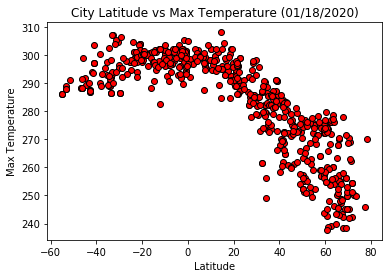

In [116]:
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("City Latitude vs Max Temperature (01/18/2020)")
plt.show()

This graph shows the relationship between city latitude and max temerature.

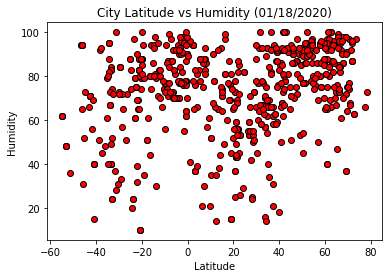

In [117]:
plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity (01/18/2020)")
plt.show()

This graph shows the relationship between city latitude and humidity.

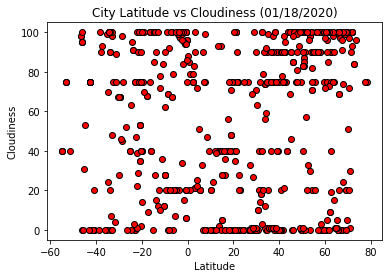

In [118]:
plt.scatter(lat, cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs Cloudiness (01/18/2020)")
plt.show()

This graph shows the relationship between city latitude and cloudiness.

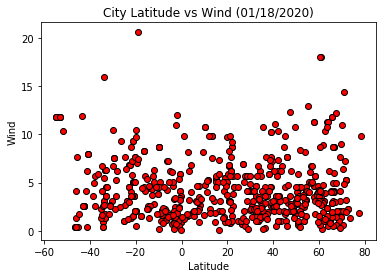

In [119]:
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title("City Latitude vs Wind (01/18/2020)")
plt.show()

This graph shows the relationship between city latitude and wind.

In [26]:
# File to Load (Remember to Change These)
file_to_load = "../output_data/cities.csv"

# Read Purchasing File and store into Pandas data frame
country_data = pd.read_csv(file_to_load)

In [28]:
country_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [34]:
northern = country_data[country_data.Lat > 0]
northern

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [35]:
len(northern)

380

In [36]:
southern = country_data[country_data.Lat < 0]
southern

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
...,...,...,...,...,...,...,...,...,...,...
526,526,viedma,14,AR,1558378894,41,-40.81,-62.99,58.56,10.98
531,531,russell,75,AR,1558378895,71,-33.01,-68.80,50.00,12.75
536,536,padang,100,ID,1558378896,82,-0.92,100.36,81.24,7.65
539,539,palu,72,ID,1558378897,80,-0.90,119.87,78.72,3.83


In [55]:
northern_lat = northern["Lat"]
northern_lat

0      68.05
2      77.48
3      40.71
8      71.64
9      57.02
       ...  
543    33.97
544    24.01
545    49.65
546    51.07
547    27.72
Name: Lat, Length: 380, dtype: float64

In [56]:
southern_lat = southern["Lat"]
southern_lat

1     -20.41
4     -33.93
5      -9.80
6     -34.58
7     -18.06
       ...  
526   -40.81
531   -33.01
536    -0.92
539    -0.90
541   -31.09
Name: Lat, Length: 168, dtype: float64

In [57]:
northern_temp = northern["Max Temp"]
northern_temp

0      37.50
2      22.20
3      44.60
8      14.10
9      65.04
       ...  
543    80.60
544    84.20
545    61.00
546    49.74
547    55.86
Name: Max Temp, Length: 380, dtype: float64

In [58]:
southern_temp = southern["Max Temp"]
southern_temp

1      78.80
4      55.99
5      81.96
6      60.01
7      72.06
       ...  
526    58.56
531    50.00
536    81.24
539    78.72
541    44.60
Name: Max Temp, Length: 168, dtype: float64

In [60]:
northern_humidity = northern["Humidity"]
northern_humidity

0      72
2      73
3      39
8      88
9      70
       ..
543    32
544     4
545    62
546    93
547    64
Name: Humidity, Length: 380, dtype: int64

In [61]:
southern_humidity = southern["Humidity"]
southern_humidity

1      74
4      76
5      76
6      62
7      23
       ..
526    41
531    71
536    82
539    80
541    87
Name: Humidity, Length: 168, dtype: int64

In [62]:
northern_cloudiness = northern["Cloudiness"]
northern_cloudiness

0        2
2       25
3        0
8       95
9        6
      ... 
543      0
544      5
545      0
546    100
547      4
Name: Cloudiness, Length: 380, dtype: int64

In [63]:
southern_cloudiness = southern["Cloudiness"]
southern_cloudiness

1       75
4       20
5       78
6        0
7        0
      ... 
526     14
531     75
536    100
539     72
541     64
Name: Cloudiness, Length: 168, dtype: int64

In [64]:
northern_wind = northern["Wind Speed"]
northern_wind

0       7.16
2       2.37
3       4.47
8      15.70
9       6.93
       ...  
543     8.05
544    16.11
545     8.05
546     2.68
547     2.84
Name: Wind Speed, Length: 380, dtype: float64

In [65]:
southern_wind = southern["Wind Speed"]
southern_wind

1      11.41
4       8.05
5      16.49
6      11.41
7       5.44
       ...  
526    10.98
531    12.75
536     7.65
539     3.83
541     5.82
Name: Wind Speed, Length: 168, dtype: float64

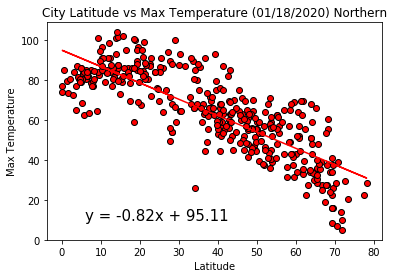

In [105]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_temp)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_temp, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("City Latitude vs Max Temperature (01/18/2020) Northern")
plt.show()

The linear regression is modeling the relationship between city latitude and max temperature in the northern hemisphere. It appears there is a relationship between latitude and max temperature. 

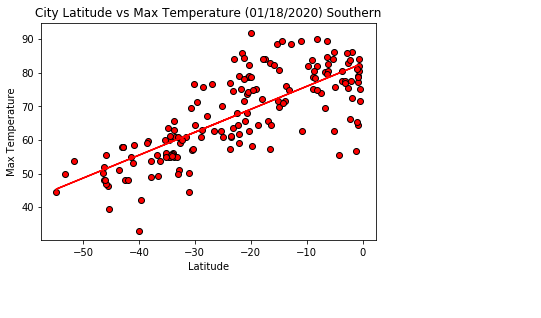

In [106]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_temp)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_temp, marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("City Latitude vs Max Temperature (01/18/2020) Southern")
plt.show()

The linear regression is modeling the relationship between city latitude and max temperature in the southern hemisphere. It appears there is a relationship between latitude and max temperature. 

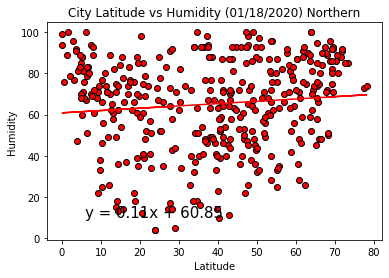

In [115]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_humidity, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity (01/18/2020) Northern")
plt.show()

The linear regression is modeling the relationship between city latitude and humidity in the northern hemisphere. It appears there is not a relationship between latitude and humidity.

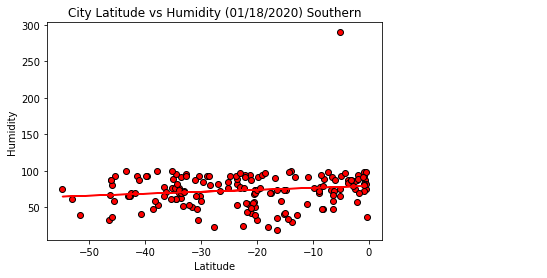

In [120]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_humidity, marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity (01/18/2020) Southern")
plt.show()

The linear regression is modeling the relationship between city latitude and humidity in the southern hemisphere. It appears there is a relationship between latitude and humidity in the southern hemisphere.

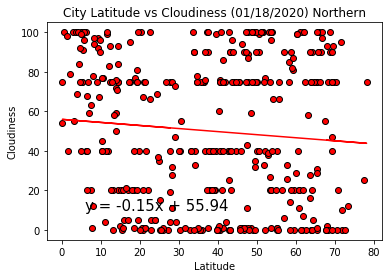

In [108]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs Cloudiness (01/18/2020) Northern")
plt.show()

The linear regression is modeling the relationship between city latitude and cloudiness in the northern hemisphere. It appears there is not a relationship between latitude and cloudiness in the northern hemisphere.

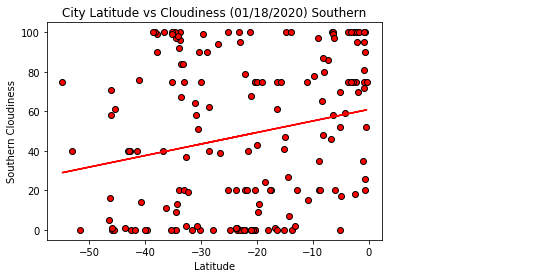

In [110]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Southern Cloudiness')
plt.title("City Latitude vs Cloudiness (01/18/2020) Southern")
plt.show()

The linear regression is modeling the relationship between city latitude and cloudiness in the southern hemisphere. It appears there is not a relationship between latitude and cloudiness in the southern hemisphere.

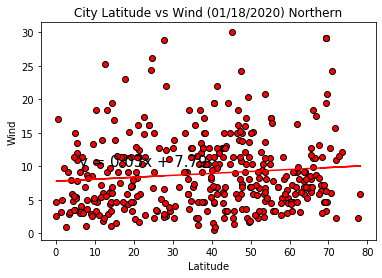

In [111]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_wind, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title("City Latitude vs Wind (01/18/2020) Northern")
plt.show()

The linear regression is modeling the relationship between city latitude and wind in the northern hemisphere. It appears there is not a relationship between latitude and wind in the northern hemisphere.

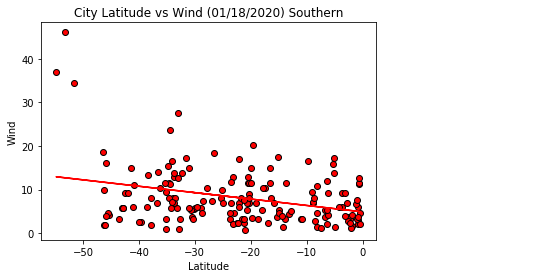

In [113]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_wind, marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title("City Latitude vs Wind (01/18/2020) Southern")
plt.show()

The linear regression is modeling the relationship between city latitude and wind in the southern hemisphere. It appears there is a relationship between latitude and wind in the southern hemisphere.